In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("customer_retention_dataset.xlsx",sheet_name="codedsheet")

In [3]:
df.head()

1Gender of respondent  2 How old are you?   \
0                      0                    3   
1                      1                    2   
2                      1                    2   
3                      0                    2   
4                      1                    2   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

   5 Since How Long You are Shopping Online ?  \
0                                           5   
1                                           5   
2                                           4   
3                                           4   
4                                           3   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  4                       
1                                                  5                       
2                                                  5                       
3                                                  1                       
4                                                  2                       

   7 How do you access the internet while shopping on-line?  \
0                                                  4          
1                                                  2          
2                                                  3          
3                                                  3          
4                                                  2          

   8 Which device do you use to access the online shopping?  \
0                                                  3          
1                                                  1          
2                                                  1          
3                                                  1          
4                                                  1          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  5                                                      
1                                                  2                                                      
2                                                  4                                                      
3                                                  4                                                      
4                                                  2                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  1                                                        
1                                                  3                                                        
2                                                  2                                                        
3                                                  3                                                        
4                                                  3                                                        

   ...  Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in        
1  ...                            Amazon.in, Flipkart.com        
2  ...                                         Myntra.com        
3  ...          

In [4]:
pd.set_option("display.max_colwidth", -1)

<ipython-input-4-a09e5efec013>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [5]:
for i,j in zip(df.dtypes,df.columns):
    print(i,j)

int64 1Gender of respondent
int64 2 How old are you? 
object 3 Which city do you shop online from?
int64 4 What is the Pin Code of where you shop online from?
int64 5 Since How Long You are Shopping Online ?
int64 6 How many times you have made an online purchase in the past 1 year?
int64 7 How do you access the internet while shopping on-line?
int64 8 Which device do you use to access the online shopping?
int64 9 What is the screen size of your mobile device?						                                        
int64 10 What is the operating system (OS) of your device?				                                          
int64 11 What browser do you run on your device to access the website?			                                                          
int64 12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   
int64 13 After first visit, how do you reach the online retail store?				              

# Maximum Customers who felt Happy after Purchase are from Delhi, Bangalore and greater Noida 

<AxesSubplot:xlabel='3 Which city do you shop online from?'>

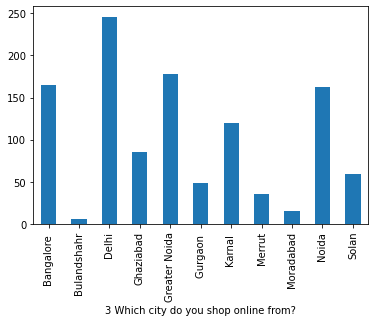

In [6]:
#df["shopping city"].groupby().sum()
df.groupby(['3 Which city do you shop online from?'])['47 Getting value for money spent'].sum().plot(kind="bar")

# From Above Bar Chart we conclude
Maximum NO. of Happy Customers after Purchase in terms of of 'Value For Money' are from DELHI and Lowest is Bulandshahr.

In [7]:
# Check Unique Values 
df['3 Which city do you shop online from?'].unique()

array(['Delhi', 'Greater Noida', 'Karnal ', 'Bangalore ', 'Noida',
       'Solan', 'Moradabad', 'Gurgaon ', 'Merrut', 'Ghaziabad',
       'Bulandshahr'], dtype=object)

In [8]:
df['47 Getting value for money spent']

0      5
1      5
2      4
3      4
4      5
      ..
264    3
265    5
266    4
267    3
268    5
Name: 47 Getting value for money spent, Length: 269, dtype: int64

# Which device is used for Online Purchase, often 
focus on smartphone users more for Advetisement alone the weightage is more tha 50% 

In [9]:
a=df.groupby(['8 Which device do you use to access the online shopping?'])['6 How many times you have made an online purchase in the past 1 year?'].sum()

In [10]:
plt_df=a.to_frame()

In [11]:
plt_df

6 How many times you have made an online purchase in the past 1 year?
8 Which device do you use to access the online shopping?                                                                       
1                                                         389                                                                  
2                                                         192                                                                  
3                                                         98                                                                   
4                                                         40



#from above Explanation of Left Column assume 1 as Smartphone
                                               #2 as laptop 
                                               #3 as Desktop
                                               #4 as Tablet
# Explanation of Left Column - Figures shows No. Of times repaet purchase done from shopping Devices.

#Now we can conclude by combining both the attributes that -
1. Maximum No. of Repeat Purchase (Customers) used SmartPhone that is 53%
2. Laptop used many of the times after Smartphone that is 26 %
3. Desktop Users are 98 only that is 13%
4.Least are the the Tablet Users.


#Finding Male/Female who shops most of the times 

In [12]:
a=df.groupby(['1Gender of respondent'])['6 How many times you have made an online purchase in the past 1 year?'].sum()

In [13]:
a

1Gender of respondent
0    222
1    497
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: int64

In [14]:
a.to_frame()
a.index=["male","female"]

<AxesSubplot:>

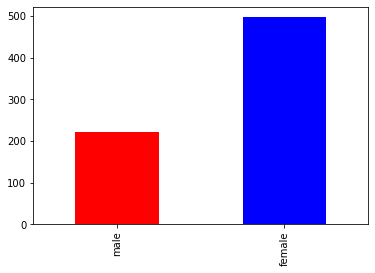

In [15]:
a.plot(kind="bar",color=['red','blue'])

In [16]:
# From above Bar chart we can conclude MOre than 70% repeat Purchase Customers are Fammale 

In [17]:
## Finding  which device is mostly used for online shoppings and the maxumum no. of Female/Male users

a=df.groupby(['1Gender of respondent','8 Which device do you use to access the online shopping?'])['6 How many times you have made an online purchase in the past 1 year?'].sum()

In [18]:
# consisered 0 As Male and 1 as Female in Gender Column
# assume 1 as Smartphone
#2 as Laptop
#3 as desktop
#4 as Tablet

In [19]:

a.to_frame()

6 How many times you have made an online purchase in the past 1 year?
1Gender of respondent 8 Which device do you use to access the online shopping?                                                                       
0                     1                                                         89                                                                   
                      2                                                         63                                                                   
                      3                                                         30                                                                   
                      4                                                         40                                                                   
1                     1                                                         300                                                                  
                      2                                                         129                                                                  
                      3                                                         68

In [20]:
#1.# As we can see that Male are only 89 and they used samrtphone who purchase again and Famales are 300 and they used amrtphone
#it means Females contribution for repeat Purchase is more than 70%. 

In [21]:
a.index


MultiIndex([(0, 1),
            (0, 2),
            (0, 3),
            (0, 4),
            (1, 1),
            (1, 2),
            (1, 3)],
           names=['1Gender of respondent', '8 Which device do you use to access the online shopping?'])

In [22]:
# Finding Maximum and Minmum times device used for shopping by  Male and Female 

In [23]:
a.index=[("male","Desktop"),("male","SmartPhone"),("male","Tablet"),("male","laptop"),("female","SmartPhone"),("male","Tablet"),("male","laptop")]

<AxesSubplot:>

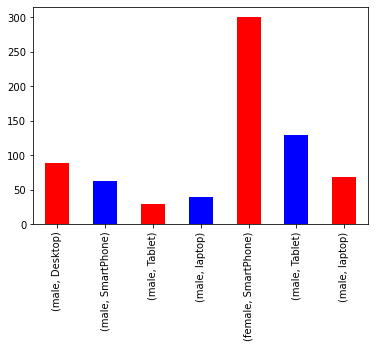

In [24]:
a.plot(kind="bar",color=['red','blue'])

In [25]:
# From Above BAr chart we can conclude
#1. Females shops most and that more tha 70% and they used smartphones, it means more than 705 users are female and device is smartphone
#2.Second is the Male and they used tablet most of the times


# Attraction platform(Display Adverts,Search Engine etc) Which leads to Customer First Purchase

In [26]:
a=df.groupby(["12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   "])['9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        '].count()

In [27]:
a.to_frame()
a.index=['Search Engine', 'Content Marketing', 'Display Adverts']

<AxesSubplot:>

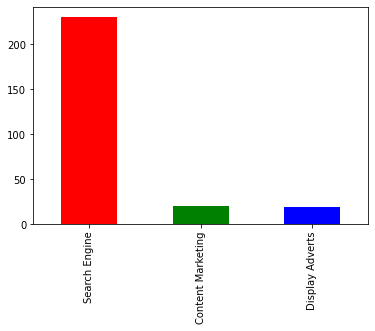

In [28]:
a.plot(kind="bar",color=['red','green','blue'])

In [29]:
# from above Bar chart we can conclude that First Time Puchase have been dome from Search Engines that more tha 90%

# Finding Who revisits and Purchase on online store most of times Male or female 

In [30]:
a=df.groupby(['1Gender of respondent','13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   '])['6 How many times you have made an online purchase in the past 1 year?'].sum()

In [31]:
# assume 1 as Search engine, 2 as Via Application,3 as Direct URL,4 as Email.

In [32]:
a.to_frame()

6 How many times you have made an online purchase in the past 1 year?
1Gender of respondent 13 After first visit, how do you reach the online retail store?\t\t\t\t                                                                                                                          
0                     1                                                                                                                           59                                                                   
                      2                                                                                                                           14                                                                   
                      3                                                                                                                           102                                                                  
                      4                                                                                                                           47                                                                   
1                     1                                                                                                                           133                                                                  
                      2                                                                                                                           46                                                                   
                      3                                                                                                                           80                                                                   
                      4                                                                                                                           238

In [33]:
# from  Above we can conclude that 59  Male uses Search Engines for Revisits and Purchase which 8% only
#14 Male Customers Uses Email For for revisits and repeat Purchase that is less than 2%
# 102 Male Users Reach again through Direct URL to reach online store

# 133 female smartphones users used smartphones
#238  female used application to revisit and repurchase